# Tabular RL Algorithms

In this assignment, you will solve the FrozenLake-v0 environment from [Gymnasium](https://gymnasium.farama.org/). You will be using this helper file to answer questions in your assignment. 


Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake. The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment. Holes in the ice are distributed in set locations using a pre-determined map, and the player makes moves until they reach the goal or fall in a hole. The map is given below for your reference

        SFFF
        FHFH
        FFFH
        HFFG
    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located
    
    
## Action Space
The player/agent can take 4 discrete actions, in the range {0,3}
* 0: Move left
* 1: Move down
* 2: Move right 
* 4: Move up


## State Space
The environment consists of 16 states. The state is a value representing the player’s current position as current_row * nrows + current_col (where both the row and col start at 0).
For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15.


## Starting State
The episode starts with the player in state [0] (location [0, 0]).


## Rewards 

* Reach goal: +1
* Reach hole: 0
* Reach frozen: 0

## Episode End
The episode ends if the following happens:
### 1.Termination:
* The player moves into a hole.
* The player reaches the goal at max(nrow) * max(ncol) - 1 (location [max(nrow)-1, max(ncol)-1]).

### 2.Truncation:
* The length of the episode is 100 for 4x4 environment.

For more info refer to source: https://gymnasium.farama.org/environments/toy_text/frozen_lake/

## The Environment Parameters
* Use discount factor, $\gamma = 0.9$
* The environment is slippery, ie., the transition kernel is stochastic.
* The transition kernel P is a dictionary. 
* P[state][action] is tuples with (probability, nextstate, reward, terminal)


### **Use the following code snippet to set up the gym environemnt for all the questions**

In [1]:
import gymnasium as gym
env = gym.make('FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True)
gamma = 0.9

In [2]:
#Obtaining environment details 
print('Number of Actions', env.action_space.n) 
print('Number of States ', env.observation_space.n)
print('P[10,3]', env.P[10][3])

Number of Actions 4
Number of States  16
P[10,3] [(0.3333333333333333, 11, 0.0, True), (0.3333333333333333, 6, 0.0, False), (0.3333333333333333, 9, 0.0, False)]


## Generating a Heatmap 
* Use the following function fancy_visual to obtain a heat map. The arguments to the function are the value function and its corresponding policy. 
* This function also prints the value function and policy. 

Value Function [0.27666681 0.20129529 0.84725383 0.15872532 0.85327002 0.61263266
 0.58395553 0.900554   0.63896219 0.49609316 0.44857011 0.67746342
 0.40395211 0.63675213 0.8669003  0.697025  ]
Policy [0 1 2 2 1 1 0 1 2 0 0 1 2 1 0 0]


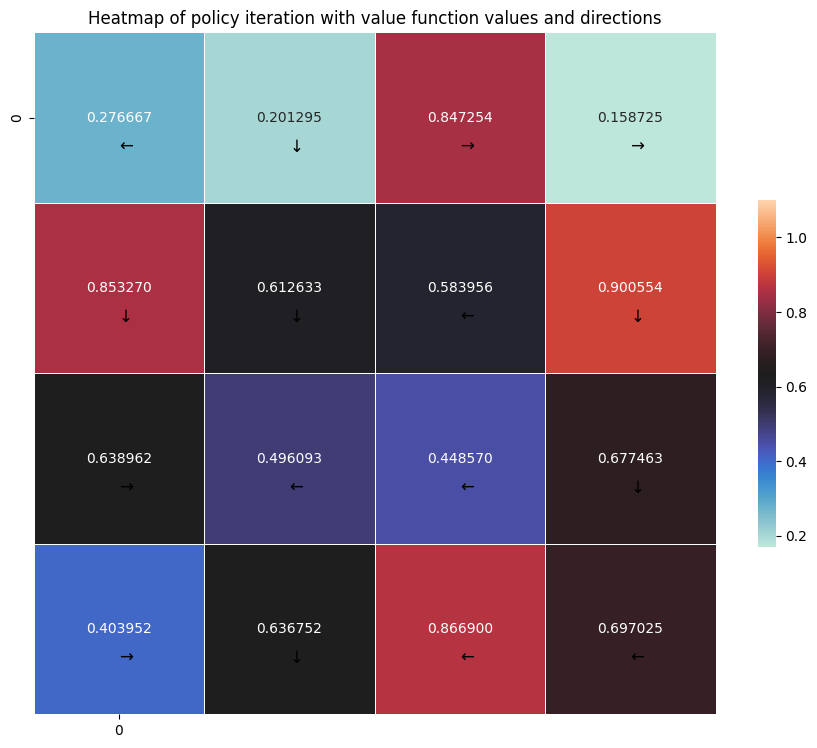

In [3]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

test_value = np.random.rand(16) #Random Value Function (only for plotting)
test_policy = np.random.randint(0,3,16) #Random Policy (only for plotting)
fancy_visual(test_value,test_policy)

# Q Learning 
* Q learning is a model free approach, thus you will not use the transition kernel. 
* You can reset the environment using env.reset()
* env.step(action) takes in action as an argument and gives next state,reward,terminal and info as the output 

In [4]:
state, info = env.reset() #Reset the env
max_step = 20 
for step in range(max_step):    
    action = env.action_space.sample() #Random Action
    n_state,reward,terminal,truncated,info = env.step(action) #Take a step 
    print("Time:",step,'State:',state,'Action:',action,'Reward:',reward,'Next State:',n_state,'Terminal:',terminal)
    state = n_state 
    if terminal or truncated: #Episode ends if the termination or truncation is true
        break   

Time: 0 State: 0 Action: 3 Reward: 0.0 Next State: 0 Terminal: False
Time: 1 State: 0 Action: 1 Reward: 0.0 Next State: 1 Terminal: False
Time: 2 State: 1 Action: 2 Reward: 0.0 Next State: 2 Terminal: False
Time: 3 State: 2 Action: 2 Reward: 0.0 Next State: 6 Terminal: False
Time: 4 State: 6 Action: 0 Reward: 0.0 Next State: 2 Terminal: False
Time: 5 State: 2 Action: 0 Reward: 0.0 Next State: 1 Terminal: False
Time: 6 State: 1 Action: 2 Reward: 0.0 Next State: 5 Terminal: True
